In [1]:

print("Walmart Sales Data Analysis")


Walmart Sales Data Analysis


In [43]:
import pandas as pd

print("Walmart Sales Data Analysis")

#data='D:\UCB\Pending Assignments\Module1'
#url='https://github.com/maniliy07/Module1/blob/main/Walmart_sales_analysis.csv'
data=pd.read_csv("https://raw.githubusercontent.com/maniliy07/Module1/refs/heads/main/Walmart_sales_analysis.csv")
#X=pd.read_csv(url)
df=pd.DataFrame(data)
print ("***INFORMATION****")
df.info()
print ("***DESCRIBE****")
print(Y.describe());
X.head();


Walmart Sales Data Analysis
***INFORMATION****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store_Number  6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   object 
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6    CPI          6435 non-null   int64  
 7   Unemployment  6435 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 402.3+ KB
***DESCRIBE****
       Store_Number  Holiday_Flag  Temperature   Fuel_Price         CPI   \
count   6435.000000   6435.000000  6435.000000  6435.000000  6435.000000   
mean      23.000000      0.069930    60.663782     3.358607   171.583994   
std       12.988182      0.255049    18.444933     0.459020    39.351305   
min        1.000000      0.000000

In [44]:
# 1. Clean and convert object columns to numeric
# Clean Weekly_Sales (has commas)
df['Weekly_Sales'] = pd.to_numeric(df['Weekly_Sales'].str.replace(',', ''), errors='coerce')
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

* Temperature: Can influence sales of seasonal goods (e.g., higher temperatures
might boost sales of summer-related items).

*Fuel Price: Higher fuel prices might reduce discretionary spending or alter
shopping habits (e.g., fewer trips to physical stores).

* CPI: Indicates inflation, which can impact purchasing power. Lower inflation can
encourage more spending.

* Unemployment: Higher unemployment generally leads to decreased consumer
confidence and reduced spending.

*** Visualization with Red, Blue, and Green using line plot and fill_between functions for comparison of data inspecting weekly sales, temperature, holiday flag, and fuel price over time.

Object to numeric conversion commands used:
df['Weekly_Sales'] = pd.to_numeric(df['Weekly_Sales'].str.replace(',', ''), errors='coerce')
df['Date'] = pd.to_datetime(df['Date'])


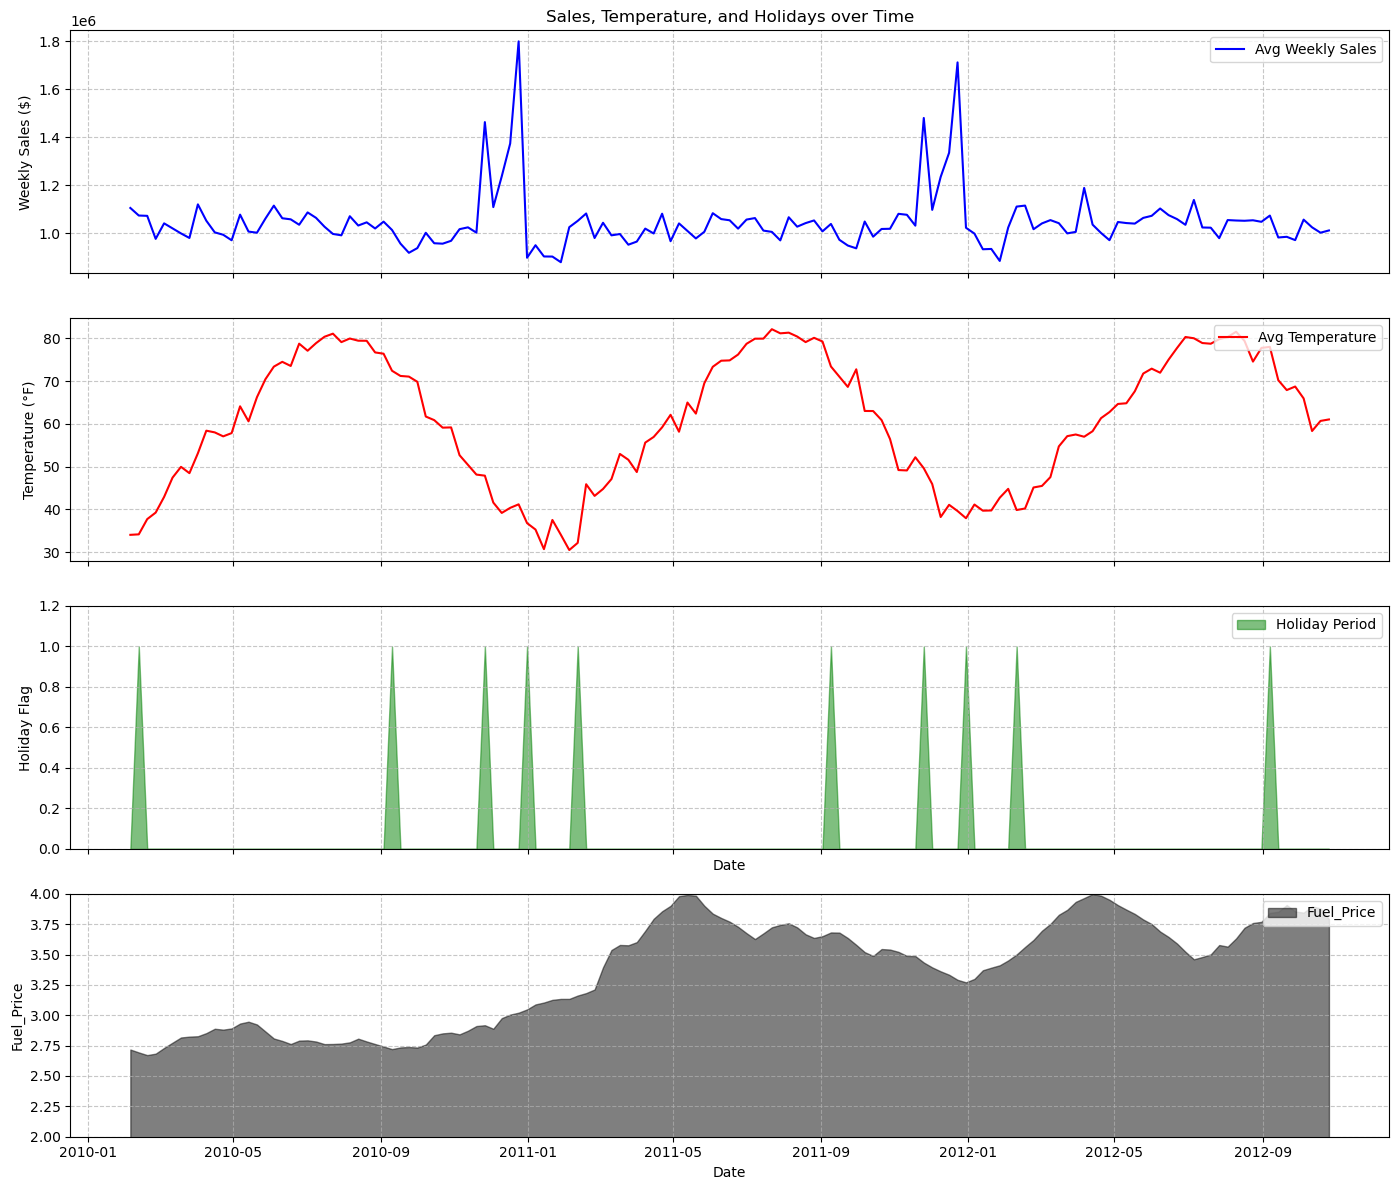

In [ ]:
import matplotlib.pyplot as plt

daily_data = df.groupby('Date').agg({
    'Fuel_Price': 'mean',
    'Weekly_Sales': 'mean',
    'Temperature': 'mean',
    'Holiday_Flag': 'max' # Max is 1 if any store had a holiday that week
}).reset_index().sort_values('Date')
# 2. Create Visualization with Red, Blue, and Green using line plot and fill_between functions for comparison of data inspecting weekly sales, temperature, holiday flag, and fuel price over time.
fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

# Plot Weekly Sales in Blue
axes[0].plot(daily_data['Date'], daily_data['Weekly_Sales'], color='blue', label='Avg Weekly Sales')
axes[0].set_ylabel('Weekly Sales ($)')
axes[0].set_title('Sales, Temperature, and Holidays over Time')
axes[0].legend(loc='upper right')
axes[0].grid(True, linestyle='--', alpha=0.7)

# Plot Temperature in Red
axes[1].plot(daily_data['Date'], daily_data['Temperature'], color='red', label='Avg Temperature')
axes[1].set_ylabel('Temperature (°F)')
axes[1].legend(loc='upper right')
axes[1].grid(True, linestyle='--', alpha=0.7)

# Plot Holiday Flag in Green
axes[2].fill_between(daily_data['Date'], 0, daily_data['Holiday_Flag'], color='green', alpha=0.5, label='Holiday Period')
axes[2].set_ylabel('Holiday Flag')
axes[2].set_xlabel('Date')
axes[2].set_ylim(0, 1.2)
axes[2].legend(loc='upper right')
axes[2].grid(True, linestyle='--', alpha=0.7)


# Plot Fuel Price in Black
axes[3].fill_between(daily_data['Date'], 0, daily_data['Fuel_Price'], color='black', alpha=0.5, label='Fuel_Price')
axes[3].set_ylabel('Fuel_Price')
axes[3].set_xlabel('Date')
axes[3].set_ylim(2, 4.0)
axes[3].legend(loc='upper right')
axes[3].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('walmart_trends.png')

print("Object to numeric conversion commands used:")
print("df['Weekly_Sales'] = pd.to_numeric(df['Weekly_Sales'].str.replace(',', ''), errors='coerce')")
print("df['Date'] = pd.to_datetime(df['Date'])")

Conclusion : During the Holiday's Sales are higher compared to Non-Holiday Sales and no impact during high temperature or fuel price high/low.  

In [47]:

print("Conclusion:During the Holiday's Sales are higher compared to Non-Holiday Sales and no impact during high temperature or fuel price high/low")



Conclusion:During the Holiday's Sales are higher compared to Non-Holiday Sales and no impact during high temperature or fuel price high/low
